Проект по ТИПиС

# 1. Введение и датасет

Будем решать задачу классификации.

Используемый датасет: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset

Этот датасет сожержит данные, относящиеся к красным сортам испанских вин. Наша цель предсказать качество вина на основе предоставленных данных.




Описание датасета:

Датасет содержит 7 500 различных видов испанских красных вин с 11 характеристиками, которые описывают их цену, рейтинг и даже некоторые вкусовые качества.


1.   winery: Winery name
2.   wine: Name of the wine
3.   year: Year in which the grapes were harvested
4.   rating: Average rating given to the wine by the users [from 1-5]
5.   num_reviews: Number of users that reviewed the wine
6.   country: Country of origin [Spain]
7.   region: Region of the wine
8.   price: Price in euros [€]
9.   type: Wine variety
10.  body: Body score, defined as the richness and 11.weight of the wine in your mouth [from 1-5]
11.  acidity: Acidity score, defined as wine's “pucker” or tartness; it's what makes a wine refreshing and your tongue salivate and want another sip [from 1-5]


Подключаем датасет:

In [1]:
! pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ermoshkinvlad","key":"eb497d0988a3bb0a96a49e81fb6f9202"}'}

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download -d fedesoriano/spanish-wine-quality-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset
License(s): copyright-authors
  0% 0.00/46.4k [00:00<?, ?B/s]
100% 46.4k/46.4k [00:00<00:00, 129MB/s]


In [5]:
! unzip '/content/spanish-wine-quality-dataset.zip' -d '/content/spanish-wine-quality'

Archive:  /content/spanish-wine-quality-dataset.zip
  inflating: /content/spanish-wine-quality/wines_SPA.csv  


# 2. Предобработка данных

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Вид данных до обработки:

In [7]:
df=pd.read_csv('/content/spanish-wine-quality/wines_SPA.csv')
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


Проведем стандартную проверку на пропуски.

In [8]:
df.isna().sum()

,0
winery,0
wine,0
year,2
rating,0
num_reviews,0
country,0
region,0
price,0
type,545
body,1169


In [9]:
# Удаление всех строк с пропущенными значениями
df = df.dropna()

# Проверка результата
print("Пропуски после очистки:")
print(df.isna().sum())
print(f"Стало записей: {len(df)}")

Пропуски после очистки:
winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64
Стало записей: 6329


In [10]:
rating_map = {
    4.2: 0,
    4.3: 1,
    4.4: 2,
    4.5: 3,
    4.6: 4,
    4.7: 5,
    4.8: 6,
    4.9: 7
}
df['rating'] = df['rating'].map(rating_map)

Целевое поле:

In [11]:
target=df['rating']
target.value_counts()

,count
rating,
0,4749
1,551
2,418
3,272
4,185
5,108
6,44
7,2


In [12]:
len(target)


6329

Удаляем целевую функцию:

In [13]:
df=df.drop(['rating'],axis=1)

Удаляем ненужные поля:

In [14]:
# Удаление ненужных столбцов
columns_to_drop = ['winery', 'wine', 'country', 'price']
df = df.drop(columns_to_drop, axis=1)

Уникальные значения полей:

In [15]:
for col in df.columns:
  print('{} : {}'.format(col, len(df[col].unique())))

year : 71
num_reviews : 740
region : 66
type : 21
body : 4
acidity : 3


In [16]:
cont=['year', 'num_reviews', 'body',	'acidity'] # непрерывные
cont

['year', 'num_reviews', 'body', 'acidity']

In [17]:
categ=[] # категориальные
for feat in df.columns:
  if (feat not in cont):
    categ.append(feat)

In [18]:
for name in categ:
    dummies = pd.get_dummies(df[name], prefix=name, dummy_na=True, drop_first=False)
    df=pd.concat([df,dummies],axis=1)
df=df.drop(columns=categ)
df.head()

,year,num_reviews,body,acidity,region_Alella,region_Alicante,region_Almansa,region_Andalucia,region_Aragon,region_Arinzano,...,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo,type_nan
0,2013,58,5.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2018,31,4.0,2.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,2009,1793,5.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1999,1705,5.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1996,1309,5.0,3.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Найти все столбцы с булевым типом данных
bool_cols = df.select_dtypes(include='bool').columns

# Преобразовать только эти столбцы в целые числа (0 и 1)
df[bool_cols] = df[bool_cols].astype(int)
df = df.replace('N.V.', 0)

Используем RobustScaler для стандартизации данных:

In [20]:
from sklearn.preprocessing import RobustScaler
import joblib
rs = RobustScaler()
df[df.columns]=rs.fit_transform(df[df.columns])
joblib.dump(rs, "robust_scaler.pkl")
df.to_csv("learn_data.csv", index=False)
df.head()

,year,num_reviews,body,acidity,region_Alella,region_Alicante,region_Almansa,region_Andalucia,region_Aragon,region_Arinzano,...,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo,type_nan
0,-0.333333,-12.740741,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.500000,-13.740741,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-1.000000,51.518519,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.666667,48.259259,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-3.166667,33.592593,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


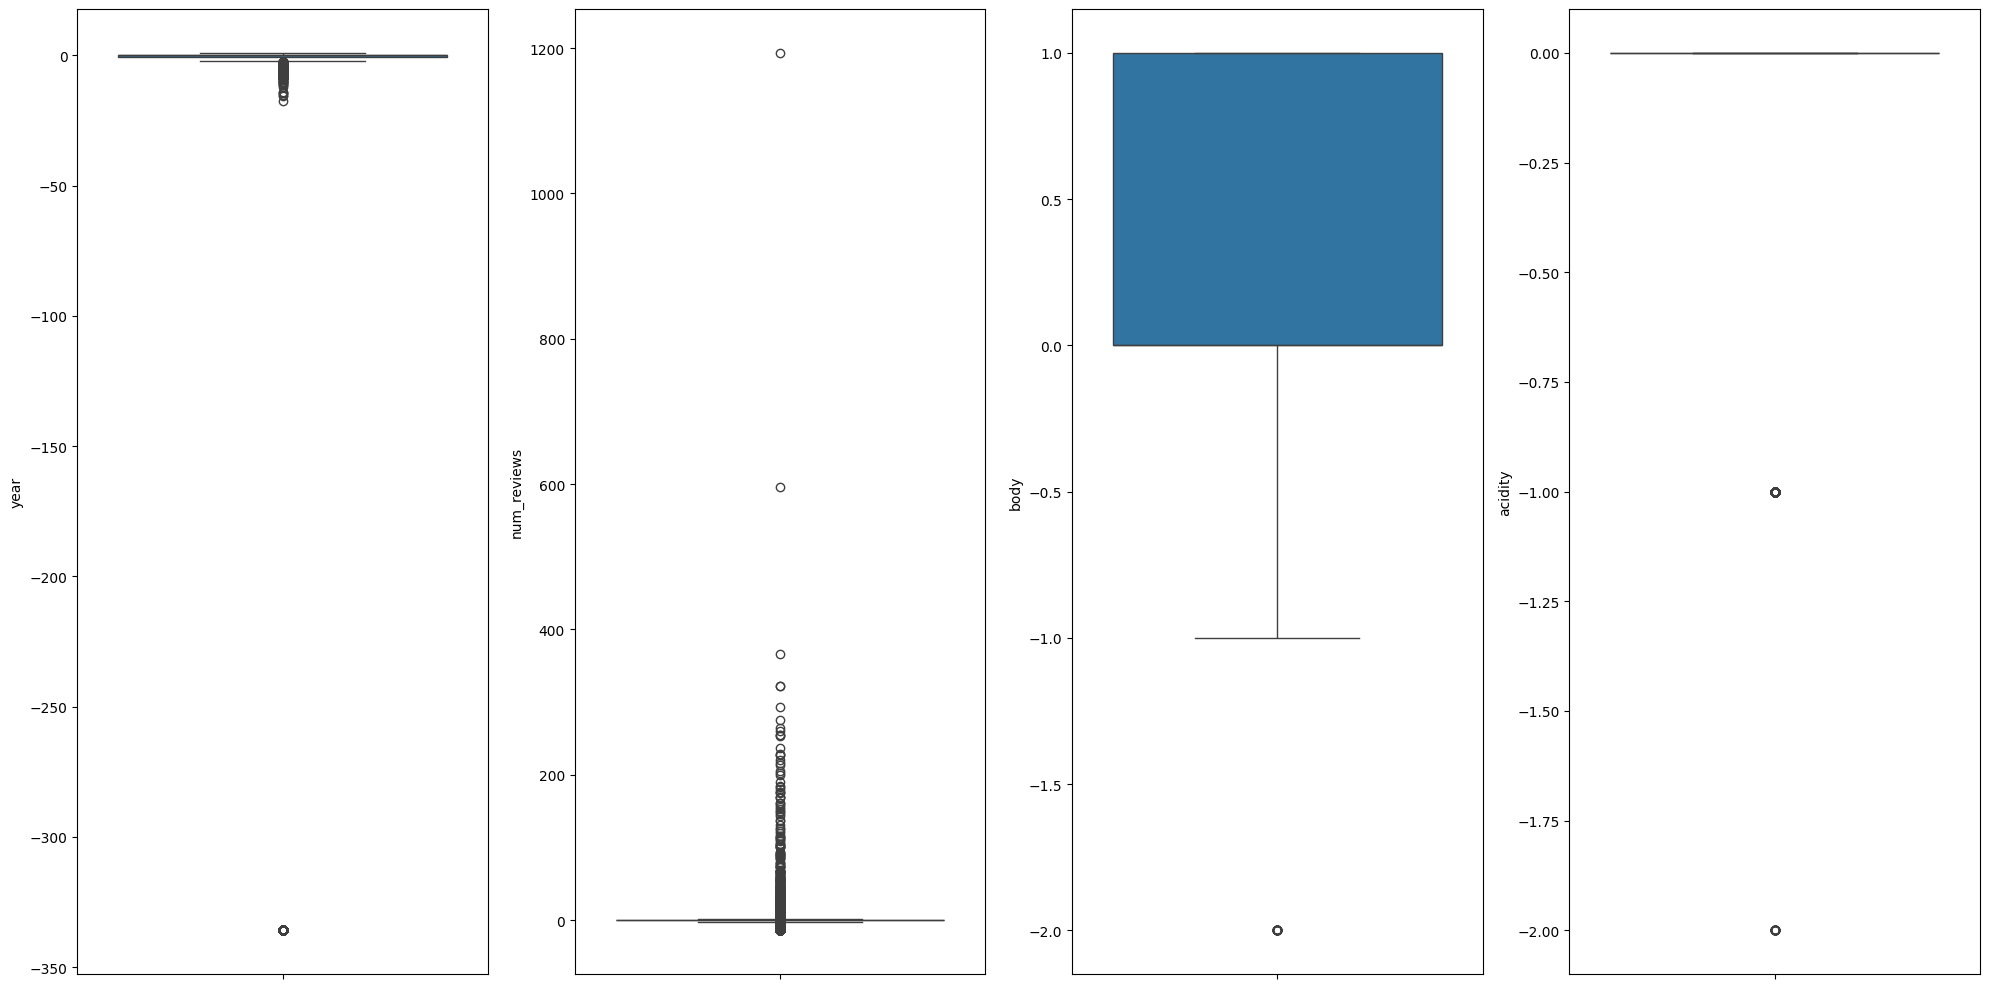

In [21]:
import seaborn as sns
fig=plt.figure(figsize=(20,10))

for i, name in enumerate(cont):
    ax=fig.add_subplot(1,len(cont), i+1)
    sns.boxplot(y=df[name], ax=ax)

fig.tight_layout()

In [22]:
corr = df[cont].corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '12pt'})\
    .set_caption("Корреляция непрерывных признаков")\
    .set_table_styles(magnify())

,year,num_reviews,body,acidity
year,1.000,-0.014,0.043,0.010
num_reviews,-0.014,1.000,0.065,0.040
body,0.043,0.065,1.000,-0.018
acidity,0.010,0.040,-0.018,1.000


# 3. Создание тренировочного, валидационного и тестового датасетов

In [23]:
X=df.values
y=target.values

Определяем веса классов.

In [24]:
from sklearn.utils.class_weight import compute_class_weight

all_classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=all_classes, y=y)
class_weights = np.array([x for x in class_weights], dtype=np.float32)
class_weights


array([1.6658770e-01, 1.4357985e+00, 1.8926436e+00, 2.9085479e+00,
       4.2763515e+00, 7.3252316e+00, 1.7980114e+01, 3.9556250e+02],
      dtype=float32)

Определяем устройство, на котором будем производить вычисления:

In [25]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader
import torchvision.transforms as T

In [26]:
device = 'cuda' if torch.cuda.is_available() else 'cpu' # вычисления на графическом процессоре, если возможно
device

'cpu'

Создаём датасеты:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_dum, y_train, y_dum=train_test_split(X,y, test_size=0.2)
X_val, X_test, y_val, y_test= train_test_split(X_dum, y_dum ,test_size=0.5)

In [28]:
class MyDataset(Dataset):
  def __init__(self, data, targets, transform=None):
      self.data = torch.Tensor(data)
      self.targets = torch.LongTensor(targets)
      self.transform = transform

  def __getitem__(self, index):
      x = self.data[index]
      y = self.targets[index]
      return x, y

  def get_labels(self):
    return self.targets

  def __len__(self):
      return len(self.data)

In [29]:
train_dataset=MyDataset(X_train,y_train)
val_dataset=MyDataset(X_val,y_val)
test_dataset=MyDataset(X_test,y_test)

In [30]:
print(f'''Длина тестовой выборки: {len(test_dataset)}
Длина валидационной выборки: {len(val_dataset)}
Длина тренировочной выборки: {len(train_dataset)}''')

Длина тестовой выборки: 633
Длина валидационной выборки: 633
Длина тренировочной выборки: 5063


Определяем размер пакета:

In [31]:
batch_size=32

In [32]:
! pip install torchsampler

Загрузчики данных:

In [33]:
train_loader = DataLoader(train_dataset, batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

# 4. Создание модели

In [34]:
class Cl_Model(nn.Module):
    def __init__(self):
        super(Cl_Model, self).__init__()
        self.fc1 = nn.Linear(93, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.fc2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.fc3 = nn.Linear(16, 8)
        self.activation = nn.LeakyReLU(inplace=True)

    def forward(self, x):
        x=self.fc1(x)
        x=self.activation(x)
        x=self.bn1(x)
        x=self.fc2(x)
        x=self.bn2(x)
        x=self.activation(x)
        x=self.fc3(x)
        return x

In [35]:
model=Cl_Model()
model.to(device);

In [36]:
! pip install torchinfo

In [37]:
from torchinfo import summary

In [38]:
summary(model, input_size=(1,93))

Layer (type:depth-idx)                   Output Shape              Param #
Cl_Model                                 [1, 8]                    --
├─Linear: 1-1                            [1, 32]                   3,008
├─LeakyReLU: 1-2                         [1, 32]                   --
├─BatchNorm1d: 1-3                       [1, 32]                   64
├─Linear: 1-4                            [1, 16]                   528
├─BatchNorm1d: 1-5                       [1, 16]                   32
├─LeakyReLU: 1-6                         [1, 16]                   --
├─Linear: 1-7                            [1, 8]                    136
Total params: 3,768
Trainable params: 3,768
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.02
Estimated Total Size (MB): 0.02

Оптимизатор, функция потерь, точность:

In [39]:
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
optimizer = optim.Adam(model.parameters(), weight_decay=0.1)

In [40]:
from tqdm import tqdm

In [41]:
def accuracy(predictions, labels):
    classes = torch.argmax(predictions, dim=1)
    return torch.mean((classes == labels).float())

# 5. Обучение модели

In [42]:
train_losses=[]
train_accs=[]
def train(model,epoch):
  print('\nEpoch : %d'%epoch)
  model.train() # веса модели можно обновлять
  running_loss= 0.
  running_acc = 0.
  for data in tqdm(train_loader):
      inputs, targets=data[0].to(device),data[1].to(device) # распаковываем пакеты
      optimizer.zero_grad() # обнуляем градиенты
      outputs=model(inputs) # считаем предсказания - прямой проход модели
      loss=criterion(outputs,targets) # ошибка пакета
      loss.backward() # обратное распространение ошибки
      optimizer.step() # итерация алгоритма оптимизации


      running_loss += loss.item()
      running_acc += accuracy(outputs,targets)

  train_loss=running_loss/len(train_loader)
  train_acc=running_acc/len(train_loader)

  train_losses.append(train_loss)
  train_accs.append(train_acc)
  print('Средняя ошибка модели на тренировочной выборке: %.4f'%(train_loss)+'   Средняя точность модели на тренировочной выборке: %.4f'%(train_acc))

In [43]:
val_losses=[]
val_accs=[]
def val(model,epoch):
    print('\nEpoch : %d'%epoch)
    model.eval() # веса модели заморожены
    running_loss = 0.
    running_acc = 0.
    with torch.no_grad(): # запрещаем переисывать градиенты
        for data in tqdm(val_loader):
            inputs, targets=data[0].to(device),data[1].to(device)
            outputs=model(inputs)
            loss=criterion(outputs,targets)

            running_loss += loss.item()
            running_acc += accuracy(outputs,targets)

        val_loss=running_loss/len(val_loader)
        val_acc=running_acc/len(val_loader)

        val_losses.append(val_loss)
        val_accs.append(val_acc)
        print('Средняя ошибка модели на валидационной выборке: %.4f'%(val_loss)+'   Средняя точность модели на валидационной выборке: %.4f'%(val_acc))

In [44]:
class EarlyStopper:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.min_validation_loss = float('inf')

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.min_delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [45]:
torch.device("cpu")

device(type='cpu')

In [46]:
max_epochs=100
best_acc=0.0
early_stopper = EarlyStopper(min_delta=0.1)
for epoch in range(1,max_epochs+1):
    train(model,epoch)
    val(model,epoch)
    if val_accs[-1] > best_acc:
       torch.save(model, 'best-model.pt')
       best_acc = val_accs[-1]
    if early_stopper.early_stop(val_losses[-1]):
      break


Epoch : 1


100%|██████████| 159/159 [00:00<00:00, 273.99it/s]


Средняя ошибка модели на тренировочной выборке: 1.9665   Средняя точность модели на тренировочной выборке: 0.4721

Epoch : 1


100%|██████████| 20/20 [00:00<00:00, 973.30it/s]


Средняя ошибка модели на валидационной выборке: 1.9379   Средняя точность модели на валидационной выборке: 0.7384

Epoch : 2


100%|██████████| 159/159 [00:00<00:00, 376.14it/s]


Средняя ошибка модели на тренировочной выборке: 1.8159   Средняя точность модели на тренировочной выборке: 0.7381

Epoch : 2


100%|██████████| 20/20 [00:00<00:00, 1210.83it/s]


Средняя ошибка модели на валидационной выборке: 1.8902   Средняя точность модели на валидационной выборке: 0.7337

Epoch : 3


100%|██████████| 159/159 [00:00<00:00, 225.28it/s]


Средняя ошибка модели на тренировочной выборке: 1.7625   Средняя точность модели на тренировочной выборке: 0.7557

Epoch : 3


100%|██████████| 20/20 [00:00<00:00, 911.34it/s]


Средняя ошибка модели на валидационной выборке: 1.8710   Средняя точность модели на валидационной выборке: 0.7322

Epoch : 4


100%|██████████| 159/159 [00:00<00:00, 256.72it/s]


Средняя ошибка модели на тренировочной выборке: 1.7423   Средняя точность модели на тренировочной выборке: 0.7631

Epoch : 4


100%|██████████| 20/20 [00:00<00:00, 931.66it/s]


Средняя ошибка модели на валидационной выборке: 1.8571   Средняя точность модели на валидационной выборке: 0.7717

Epoch : 5


100%|██████████| 159/159 [00:00<00:00, 283.57it/s]


Средняя ошибка модели на тренировочной выборке: 1.7400   Средняя точность модели на тренировочной выборке: 0.7793

Epoch : 5


100%|██████████| 20/20 [00:00<00:00, 990.07it/s]


Средняя ошибка модели на валидационной выборке: 1.8638   Средняя точность модели на валидационной выборке: 0.7400

Epoch : 6


100%|██████████| 159/159 [00:00<00:00, 261.67it/s]


Средняя ошибка модели на тренировочной выборке: 1.7442   Средняя точность модели на тренировочной выборке: 0.7728

Epoch : 6


100%|██████████| 20/20 [00:00<00:00, 683.52it/s]


Средняя ошибка модели на валидационной выборке: 1.8632   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 7


100%|██████████| 159/159 [00:00<00:00, 235.37it/s]


Средняя ошибка модели на тренировочной выборке: 1.7462   Средняя точность модели на тренировочной выборке: 0.7771

Epoch : 7


100%|██████████| 20/20 [00:00<00:00, 566.40it/s]


Средняя ошибка модели на валидационной выборке: 1.8632   Средняя точность модели на валидационной выборке: 0.7634

Epoch : 8


100%|██████████| 159/159 [00:00<00:00, 340.57it/s]


Средняя ошибка модели на тренировочной выборке: 1.7537   Средняя точность модели на тренировочной выборке: 0.7773

Epoch : 8


100%|██████████| 20/20 [00:00<00:00, 1091.81it/s]


Средняя ошибка модели на валидационной выборке: 1.8656   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 9


100%|██████████| 159/159 [00:00<00:00, 372.38it/s]


Средняя ошибка модели на тренировочной выборке: 1.7577   Средняя точность модели на тренировочной выборке: 0.7761

Epoch : 9


100%|██████████| 20/20 [00:00<00:00, 1076.86it/s]


Средняя ошибка модели на валидационной выборке: 1.8664   Средняя точность модели на валидационной выборке: 0.7744

Epoch : 10


100%|██████████| 159/159 [00:00<00:00, 392.95it/s]


Средняя ошибка модели на тренировочной выборке: 1.7606   Средняя точность модели на тренировочной выборке: 0.7769

Epoch : 10


100%|██████████| 20/20 [00:00<00:00, 1407.77it/s]


Средняя ошибка модели на валидационной выборке: 1.8707   Средняя точность модели на валидационной выборке: 0.7458

Epoch : 11


100%|██████████| 159/159 [00:00<00:00, 373.34it/s]


Средняя ошибка модели на тренировочной выборке: 1.7630   Средняя точность модели на тренировочной выборке: 0.7793

Epoch : 11


100%|██████████| 20/20 [00:00<00:00, 1344.82it/s]


Средняя ошибка модели на валидационной выборке: 1.8662   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 12


100%|██████████| 159/159 [00:00<00:00, 373.19it/s]


Средняя ошибка модели на тренировочной выборке: 1.7627   Средняя точность модели на тренировочной выборке: 0.7830

Epoch : 12


100%|██████████| 20/20 [00:00<00:00, 1346.14it/s]


Средняя ошибка модели на валидационной выборке: 1.8647   Средняя точность модели на валидационной выборке: 0.7826

Epoch : 13


100%|██████████| 159/159 [00:00<00:00, 392.99it/s]


Средняя ошибка модели на тренировочной выборке: 1.7625   Средняя точность модели на тренировочной выборке: 0.7806

Epoch : 13


100%|██████████| 20/20 [00:00<00:00, 852.43it/s]


Средняя ошибка модели на валидационной выборке: 1.8644   Средняя точность модели на валидационной выборке: 0.7842

Epoch : 14


100%|██████████| 159/159 [00:00<00:00, 374.41it/s]


Средняя ошибка модели на тренировочной выборке: 1.7613   Средняя точность модели на тренировочной выборке: 0.7848

Epoch : 14


100%|██████████| 20/20 [00:00<00:00, 1219.93it/s]


Средняя ошибка модели на валидационной выборке: 1.8609   Средняя точность модели на валидационной выборке: 0.7826

Epoch : 15


100%|██████████| 159/159 [00:00<00:00, 384.24it/s]


Средняя ошибка модели на тренировочной выборке: 1.7628   Средняя точность модели на тренировочной выборке: 0.7838

Epoch : 15


100%|██████████| 20/20 [00:00<00:00, 1187.80it/s]


Средняя ошибка модели на валидационной выборке: 1.8582   Средняя точность модели на валидационной выборке: 0.7791

Epoch : 16


100%|██████████| 159/159 [00:00<00:00, 314.69it/s]


Средняя ошибка модели на тренировочной выборке: 1.7595   Средняя точность модели на тренировочной выборке: 0.7840

Epoch : 16


100%|██████████| 20/20 [00:00<00:00, 904.61it/s]


Средняя ошибка модели на валидационной выборке: 1.8627   Средняя точность модели на валидационной выборке: 0.7791

Epoch : 17


100%|██████████| 159/159 [00:00<00:00, 270.89it/s]


Средняя ошибка модели на тренировочной выборке: 1.7628   Средняя точность модели на тренировочной выборке: 0.7806

Epoch : 17


100%|██████████| 20/20 [00:00<00:00, 833.51it/s]


Средняя ошибка модели на валидационной выборке: 1.8645   Средняя точность модели на валидационной выборке: 0.7822

Epoch : 18


100%|██████████| 159/159 [00:00<00:00, 350.51it/s]


Средняя ошибка модели на тренировочной выборке: 1.7583   Средняя точность модели на тренировочной выборке: 0.7834

Epoch : 18


100%|██████████| 20/20 [00:00<00:00, 1047.10it/s]


Средняя ошибка модели на валидационной выборке: 1.8617   Средняя точность модели на валидационной выборке: 0.7837

Epoch : 19


100%|██████████| 159/159 [00:00<00:00, 390.20it/s]


Средняя ошибка модели на тренировочной выборке: 1.7586   Средняя точность модели на тренировочной выборке: 0.7826

Epoch : 19


100%|██████████| 20/20 [00:00<00:00, 1052.36it/s]


Средняя ошибка модели на валидационной выборке: 1.8632   Средняя точность модели на валидационной выборке: 0.7853

Epoch : 20


100%|██████████| 159/159 [00:00<00:00, 374.82it/s]


Средняя ошибка модели на тренировочной выборке: 1.7606   Средняя точность модели на тренировочной выборке: 0.7846

Epoch : 20


100%|██████████| 20/20 [00:00<00:00, 757.45it/s]


Средняя ошибка модели на валидационной выборке: 1.8581   Средняя точность модели на валидационной выборке: 0.7822

Epoch : 21


100%|██████████| 159/159 [00:00<00:00, 375.92it/s]


Средняя ошибка модели на тренировочной выборке: 1.7530   Средняя точность модели на тренировочной выборке: 0.7875

Epoch : 21


100%|██████████| 20/20 [00:00<00:00, 1261.84it/s]


Средняя ошибка модели на валидационной выборке: 1.8626   Средняя точность модели на валидационной выборке: 0.7806

Epoch : 22


100%|██████████| 159/159 [00:00<00:00, 382.91it/s]


Средняя ошибка модели на тренировочной выборке: 1.7587   Средняя точность модели на тренировочной выборке: 0.7846

Epoch : 22


100%|██████████| 20/20 [00:00<00:00, 1044.00it/s]


Средняя ошибка модели на валидационной выборке: 1.8577   Средняя точность модели на валидационной выборке: 0.7853

Epoch : 23


100%|██████████| 159/159 [00:00<00:00, 371.45it/s]


Средняя ошибка модели на тренировочной выборке: 1.7503   Средняя точность модели на тренировочной выборке: 0.7887

Epoch : 23


100%|██████████| 20/20 [00:00<00:00, 1208.26it/s]


Средняя ошибка модели на валидационной выборке: 1.8560   Средняя точность модели на валидационной выборке: 0.7791

Epoch : 24


100%|██████████| 159/159 [00:00<00:00, 377.41it/s]


Средняя ошибка модели на тренировочной выборке: 1.7517   Средняя точность модели на тренировочной выборке: 0.7881

Epoch : 24


100%|██████████| 20/20 [00:00<00:00, 1178.04it/s]


Средняя ошибка модели на валидационной выборке: 1.8617   Средняя точность модели на валидационной выборке: 0.7759

Epoch : 25


100%|██████████| 159/159 [00:00<00:00, 358.69it/s]


Средняя ошибка модели на тренировочной выборке: 1.7506   Средняя точность модели на тренировочной выборке: 0.7889

Epoch : 25


100%|██████████| 20/20 [00:00<00:00, 1190.21it/s]


Средняя ошибка модели на валидационной выборке: 1.8640   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 26


100%|██████████| 159/159 [00:00<00:00, 392.35it/s]


Средняя ошибка модели на тренировочной выборке: 1.7556   Средняя точность модели на тренировочной выборке: 0.7855

Epoch : 26


100%|██████████| 20/20 [00:00<00:00, 770.62it/s]


Средняя ошибка модели на валидационной выборке: 1.8609   Средняя точность модели на валидационной выборке: 0.7806

Epoch : 27


100%|██████████| 159/159 [00:00<00:00, 382.36it/s]


Средняя ошибка модели на тренировочной выборке: 1.7483   Средняя точность модели на тренировочной выборке: 0.7909

Epoch : 27


100%|██████████| 20/20 [00:00<00:00, 1078.37it/s]


Средняя ошибка модели на валидационной выборке: 1.8563   Средняя точность модели на валидационной выборке: 0.7806

Epoch : 28


100%|██████████| 159/159 [00:00<00:00, 393.89it/s]


Средняя ошибка модели на тренировочной выборке: 1.7531   Средняя точность модели на тренировочной выборке: 0.7850

Epoch : 28


100%|██████████| 20/20 [00:00<00:00, 1178.51it/s]


Средняя ошибка модели на валидационной выборке: 1.8650   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 29


100%|██████████| 159/159 [00:00<00:00, 323.42it/s]


Средняя ошибка модели на тренировочной выборке: 1.7556   Средняя точность модели на тренировочной выборке: 0.7875

Epoch : 29


100%|██████████| 20/20 [00:00<00:00, 912.46it/s]


Средняя ошибка модели на валидационной выборке: 1.8594   Средняя точность модели на валидационной выборке: 0.7822

Epoch : 30


100%|██████████| 159/159 [00:00<00:00, 251.20it/s]


Средняя ошибка модели на тренировочной выборке: 1.7498   Средняя точность модели на тренировочной выборке: 0.7885

Epoch : 30


100%|██████████| 20/20 [00:00<00:00, 656.27it/s]


Средняя ошибка модели на валидационной выборке: 1.8676   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 31


100%|██████████| 159/159 [00:00<00:00, 276.11it/s]


Средняя ошибка модели на тренировочной выборке: 1.7517   Средняя точность модели на тренировочной выборке: 0.7889

Epoch : 31


100%|██████████| 20/20 [00:00<00:00, 750.44it/s]


Средняя ошибка модели на валидационной выборке: 1.8574   Средняя точность модели на валидационной выборке: 0.7759

Epoch : 32


100%|██████████| 159/159 [00:00<00:00, 268.44it/s]


Средняя ошибка модели на тренировочной выборке: 1.7493   Средняя точность модели на тренировочной выборке: 0.7865

Epoch : 32


100%|██████████| 20/20 [00:00<00:00, 724.04it/s]


Средняя ошибка модели на валидационной выборке: 1.8650   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 33


100%|██████████| 159/159 [00:00<00:00, 239.68it/s]


Средняя ошибка модели на тренировочной выборке: 1.7491   Средняя точность модели на тренировочной выборке: 0.7871

Epoch : 33


100%|██████████| 20/20 [00:00<00:00, 644.82it/s]


Средняя ошибка модели на валидационной выборке: 1.8604   Средняя точность модели на валидационной выборке: 0.7759

Epoch : 34


100%|██████████| 159/159 [00:00<00:00, 388.02it/s]


Средняя ошибка модели на тренировочной выборке: 1.7491   Средняя точность модели на тренировочной выборке: 0.7901

Epoch : 34


100%|██████████| 20/20 [00:00<00:00, 1245.54it/s]


Средняя ошибка модели на валидационной выборке: 1.8597   Средняя точность модели на валидационной выборке: 0.7791

Epoch : 35


100%|██████████| 159/159 [00:00<00:00, 356.51it/s]


Средняя ошибка модели на тренировочной выборке: 1.7509   Средняя точность модели на тренировочной выборке: 0.7840

Epoch : 35


100%|██████████| 20/20 [00:00<00:00, 1267.81it/s]


Средняя ошибка модели на валидационной выборке: 1.8521   Средняя точность модели на валидационной выборке: 0.7744

Epoch : 36


100%|██████████| 159/159 [00:00<00:00, 385.38it/s]


Средняя ошибка модели на тренировочной выборке: 1.7478   Средняя точность модели на тренировочной выборке: 0.7871

Epoch : 36


100%|██████████| 20/20 [00:00<00:00, 1335.64it/s]


Средняя ошибка модели на валидационной выборке: 1.8611   Средняя точность модели на валидационной выборке: 0.7650

Epoch : 37


100%|██████████| 159/159 [00:00<00:00, 339.64it/s]


Средняя ошибка модели на тренировочной выборке: 1.7504   Средняя точность модели на тренировочной выборке: 0.7885

Epoch : 37


100%|██████████| 20/20 [00:00<00:00, 956.05it/s]


Средняя ошибка модели на валидационной выборке: 1.8516   Средняя точность модели на валидационной выборке: 0.7806

Epoch : 38


100%|██████████| 159/159 [00:00<00:00, 370.21it/s]


Средняя ошибка модели на тренировочной выборке: 1.7463   Средняя точность модели на тренировочной выборке: 0.7889

Epoch : 38


100%|██████████| 20/20 [00:00<00:00, 1076.32it/s]


Средняя ошибка модели на валидационной выборке: 1.8636   Средняя точность модели на валидационной выборке: 0.7759

Epoch : 39


100%|██████████| 159/159 [00:00<00:00, 389.12it/s]


Средняя ошибка модели на тренировочной выборке: 1.7515   Средняя точность модели на тренировочной выборке: 0.7887

Epoch : 39


100%|██████████| 20/20 [00:00<00:00, 1225.94it/s]


Средняя ошибка модели на валидационной выборке: 1.8596   Средняя точность модели на валидационной выборке: 0.7791

Epoch : 40


100%|██████████| 159/159 [00:00<00:00, 370.74it/s]


Средняя ошибка модели на тренировочной выборке: 1.7472   Средняя точность модели на тренировочной выборке: 0.7877

Epoch : 40


100%|██████████| 20/20 [00:00<00:00, 1107.86it/s]


Средняя ошибка модели на валидационной выборке: 1.8622   Средняя точность модели на валидационной выборке: 0.7775

Epoch : 41


100%|██████████| 159/159 [00:00<00:00, 389.60it/s]


Средняя ошибка модели на тренировочной выборке: 1.7461   Средняя точность модели на тренировочной выборке: 0.7869

Epoch : 41


100%|██████████| 20/20 [00:00<00:00, 1088.34it/s]


Средняя ошибка модели на валидационной выборке: 1.8622   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 42


100%|██████████| 159/159 [00:00<00:00, 356.51it/s]


Средняя ошибка модели на тренировочной выборке: 1.7494   Средняя точность модели на тренировочной выборке: 0.7883

Epoch : 42


100%|██████████| 20/20 [00:00<00:00, 1352.87it/s]


Средняя ошибка модели на валидационной выборке: 1.8560   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 43


100%|██████████| 159/159 [00:00<00:00, 360.07it/s]


Средняя ошибка модели на тренировочной выборке: 1.7478   Средняя точность модели на тренировочной выборке: 0.7895

Epoch : 43


100%|██████████| 20/20 [00:00<00:00, 1284.86it/s]


Средняя ошибка модели на валидационной выборке: 1.8701   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 44


100%|██████████| 159/159 [00:00<00:00, 346.86it/s]


Средняя ошибка модели на тренировочной выборке: 1.7501   Средняя точность модели на тренировочной выборке: 0.7905

Epoch : 44


100%|██████████| 20/20 [00:00<00:00, 1223.99it/s]


Средняя ошибка модели на валидационной выборке: 1.8619   Средняя точность модели на валидационной выборке: 0.7744

Epoch : 45


100%|██████████| 159/159 [00:00<00:00, 381.11it/s]


Средняя ошибка модели на тренировочной выборке: 1.7468   Средняя точность модели на тренировочной выборке: 0.7869

Epoch : 45


100%|██████████| 20/20 [00:00<00:00, 1322.46it/s]


Средняя ошибка модели на валидационной выборке: 1.8653   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 46


100%|██████████| 159/159 [00:00<00:00, 349.68it/s]


Средняя ошибка модели на тренировочной выборке: 1.7520   Средняя точность модели на тренировочной выборке: 0.7861

Epoch : 46


100%|██████████| 20/20 [00:00<00:00, 953.39it/s]


Средняя ошибка модели на валидационной выборке: 1.8605   Средняя точность модели на валидационной выборке: 0.7650

Epoch : 47


100%|██████████| 159/159 [00:00<00:00, 362.71it/s]


Средняя ошибка модели на тренировочной выборке: 1.7479   Средняя точность модели на тренировочной выборке: 0.7865

Epoch : 47


100%|██████████| 20/20 [00:00<00:00, 1205.23it/s]


Средняя ошибка модели на валидационной выборке: 1.8640   Средняя точность модели на валидационной выборке: 0.7634

Epoch : 48


100%|██████████| 159/159 [00:00<00:00, 361.98it/s]


Средняя ошибка модели на тренировочной выборке: 1.7472   Средняя точность модели на тренировочной выборке: 0.7881

Epoch : 48


100%|██████████| 20/20 [00:00<00:00, 1119.96it/s]


Средняя ошибка модели на валидационной выборке: 1.8530   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 49


100%|██████████| 159/159 [00:00<00:00, 337.04it/s]


Средняя ошибка модели на тренировочной выборке: 1.7432   Средняя точность модели на тренировочной выборке: 0.7885

Epoch : 49


100%|██████████| 20/20 [00:00<00:00, 915.77it/s]


Средняя ошибка модели на валидационной выборке: 1.8597   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 50


100%|██████████| 159/159 [00:00<00:00, 356.12it/s]


Средняя ошибка модели на тренировочной выборке: 1.7509   Средняя точность модели на тренировочной выборке: 0.7855

Epoch : 50


100%|██████████| 20/20 [00:00<00:00, 858.53it/s]


Средняя ошибка модели на валидационной выборке: 1.8581   Средняя точность модели на валидационной выборке: 0.7713

Epoch : 51


100%|██████████| 159/159 [00:00<00:00, 327.39it/s]


Средняя ошибка модели на тренировочной выборке: 1.7451   Средняя точность модели на тренировочной выборке: 0.7889

Epoch : 51


100%|██████████| 20/20 [00:00<00:00, 1007.77it/s]


Средняя ошибка модели на валидационной выборке: 1.8624   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 52


100%|██████████| 159/159 [00:00<00:00, 346.37it/s]


Средняя ошибка модели на тренировочной выборке: 1.7468   Средняя точность модели на тренировочной выборке: 0.7895

Epoch : 52


100%|██████████| 20/20 [00:00<00:00, 780.41it/s]


Средняя ошибка модели на валидационной выборке: 1.8605   Средняя точность модели на валидационной выборке: 0.7713

Epoch : 53


100%|██████████| 159/159 [00:00<00:00, 329.06it/s]


Средняя ошибка модели на тренировочной выборке: 1.7442   Средняя точность модели на тренировочной выборке: 0.7887

Epoch : 53


100%|██████████| 20/20 [00:00<00:00, 794.52it/s]


Средняя ошибка модели на валидационной выборке: 1.8618   Средняя точность модели на валидационной выборке: 0.7650

Epoch : 54


100%|██████████| 159/159 [00:00<00:00, 340.88it/s]


Средняя ошибка модели на тренировочной выборке: 1.7505   Средняя точность модели на тренировочной выборке: 0.7822

Epoch : 54


100%|██████████| 20/20 [00:00<00:00, 812.48it/s]


Средняя ошибка модели на валидационной выборке: 1.8521   Средняя точность модели на валидационной выборке: 0.7634

Epoch : 55


100%|██████████| 159/159 [00:01<00:00, 152.26it/s]


Средняя ошибка модели на тренировочной выборке: 1.7439   Средняя точность модели на тренировочной выборке: 0.7924

Epoch : 55


100%|██████████| 20/20 [00:00<00:00, 628.71it/s]


Средняя ошибка модели на валидационной выборке: 1.8570   Средняя точность модели на валидационной выборке: 0.7666

Epoch : 56


100%|██████████| 159/159 [00:01<00:00, 104.23it/s]


Средняя ошибка модели на тренировочной выборке: 1.7470   Средняя точность модели на тренировочной выборке: 0.7924

Epoch : 56


100%|██████████| 20/20 [00:00<00:00, 277.93it/s]


Средняя ошибка модели на валидационной выборке: 1.8509   Средняя точность модели на валидационной выборке: 0.7713

Epoch : 57


100%|██████████| 159/159 [00:01<00:00, 105.02it/s]


Средняя ошибка модели на тренировочной выборке: 1.7435   Средняя точность модели на тренировочной выборке: 0.7895

Epoch : 57


100%|██████████| 20/20 [00:00<00:00, 414.12it/s]


Средняя ошибка модели на валидационной выборке: 1.8631   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 58


100%|██████████| 159/159 [00:01<00:00, 130.17it/s]


Средняя ошибка модели на тренировочной выборке: 1.7462   Средняя точность модели на тренировочной выборке: 0.7910

Epoch : 58


100%|██████████| 20/20 [00:00<00:00, 254.76it/s]


Средняя ошибка модели на валидационной выборке: 1.8515   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 59


100%|██████████| 159/159 [00:01<00:00, 140.13it/s]


Средняя ошибка модели на тренировочной выборке: 1.7432   Средняя точность модели на тренировочной выборке: 0.7895

Epoch : 59


100%|██████████| 20/20 [00:00<00:00, 703.86it/s]


Средняя ошибка модели на валидационной выборке: 1.8633   Средняя точность модели на валидационной выборке: 0.7619

Epoch : 60


100%|██████████| 159/159 [00:00<00:00, 170.08it/s]


Средняя ошибка модели на тренировочной выборке: 1.7479   Средняя точность модели на тренировочной выборке: 0.7887

Epoch : 60


100%|██████████| 20/20 [00:00<00:00, 237.76it/s]


Средняя ошибка модели на валидационной выборке: 1.8561   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 61


100%|██████████| 159/159 [00:01<00:00, 152.81it/s]


Средняя ошибка модели на тренировочной выборке: 1.7453   Средняя точность модели на тренировочной выборке: 0.7891

Epoch : 61


100%|██████████| 20/20 [00:00<00:00, 504.87it/s]


Средняя ошибка модели на валидационной выборке: 1.8599   Средняя точность модели на валидационной выборке: 0.7619

Epoch : 62


100%|██████████| 159/159 [00:01<00:00, 135.63it/s]


Средняя ошибка модели на тренировочной выборке: 1.7474   Средняя точность модели на тренировочной выборке: 0.7912

Epoch : 62


100%|██████████| 20/20 [00:00<00:00, 603.13it/s]


Средняя ошибка модели на валидационной выборке: 1.8594   Средняя точность модели на валидационной выборке: 0.7697

Epoch : 63


100%|██████████| 159/159 [00:01<00:00, 155.89it/s]


Средняя ошибка модели на тренировочной выборке: 1.7449   Средняя точность модели на тренировочной выборке: 0.7891

Epoch : 63


100%|██████████| 20/20 [00:00<00:00, 184.01it/s]


Средняя ошибка модели на валидационной выборке: 1.8697   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 64


100%|██████████| 159/159 [00:01<00:00, 141.94it/s]


Средняя ошибка модели на тренировочной выборке: 1.7488   Средняя точность модели на тренировочной выборке: 0.7899

Epoch : 64


100%|██████████| 20/20 [00:00<00:00, 333.52it/s]


Средняя ошибка модели на валидационной выборке: 1.8637   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 65


100%|██████████| 159/159 [00:01<00:00, 88.32it/s]


Средняя ошибка модели на тренировочной выборке: 1.7458   Средняя точность модели на тренировочной выборке: 0.7901

Epoch : 65


100%|██████████| 20/20 [00:00<00:00, 228.66it/s]


Средняя ошибка модели на валидационной выборке: 1.8697   Средняя точность модели на валидационной выборке: 0.7509

Epoch : 66


100%|██████████| 159/159 [00:02<00:00, 73.12it/s]


Средняя ошибка модели на тренировочной выборке: 1.7478   Средняя точность модели на тренировочной выборке: 0.7914

Epoch : 66


100%|██████████| 20/20 [00:00<00:00, 222.53it/s]


Средняя ошибка модели на валидационной выборке: 1.8581   Средняя точность модели на валидационной выборке: 0.7634

Epoch : 67


100%|██████████| 159/159 [00:01<00:00, 147.16it/s]


Средняя ошибка модели на тренировочной выборке: 1.7465   Средняя точность модели на тренировочной выборке: 0.7893

Epoch : 67


100%|██████████| 20/20 [00:00<00:00, 543.89it/s]


Средняя ошибка модели на валидационной выборке: 1.8692   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 68


100%|██████████| 159/159 [00:01<00:00, 136.84it/s]


Средняя ошибка модели на тренировочной выборке: 1.7561   Средняя точность модели на тренировочной выборке: 0.7808

Epoch : 68


100%|██████████| 20/20 [00:00<00:00, 376.66it/s]


Средняя ошибка модели на валидационной выборке: 1.8662   Средняя точность модели на валидационной выборке: 0.7541

Epoch : 69


100%|██████████| 159/159 [00:01<00:00, 145.58it/s]


Средняя ошибка модели на тренировочной выборке: 1.7510   Средняя точность модели на тренировочной выборке: 0.7840

Epoch : 69


100%|██████████| 20/20 [00:00<00:00, 322.71it/s]


Средняя ошибка модели на валидационной выборке: 1.8694   Средняя точность модели на валидационной выборке: 0.7525

Epoch : 70


100%|██████████| 159/159 [00:01<00:00, 121.83it/s]


Средняя ошибка модели на тренировочной выборке: 1.7562   Средняя точность модели на тренировочной выборке: 0.7802

Epoch : 70


100%|██████████| 20/20 [00:00<00:00, 533.47it/s]


Средняя ошибка модели на валидационной выборке: 1.8657   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 71


100%|██████████| 159/159 [00:00<00:00, 159.43it/s]


Средняя ошибка модели на тренировочной выборке: 1.7517   Средняя точность модели на тренировочной выборке: 0.7853

Epoch : 71


100%|██████████| 20/20 [00:00<00:00, 699.85it/s]


Средняя ошибка модели на валидационной выборке: 1.8680   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 72


100%|██████████| 159/159 [00:01<00:00, 141.01it/s]


Средняя ошибка модели на тренировочной выборке: 1.7588   Средняя точность модели на тренировочной выборке: 0.7726

Epoch : 72


100%|██████████| 20/20 [00:00<00:00, 165.90it/s]


Средняя ошибка модели на валидационной выборке: 1.8687   Средняя точность модели на валидационной выборке: 0.7514

Epoch : 73


100%|██████████| 159/159 [00:01<00:00, 106.96it/s]


Средняя ошибка модели на тренировочной выборке: 1.7543   Средняя точность модели на тренировочной выборке: 0.7816

Epoch : 73


100%|██████████| 20/20 [00:00<00:00, 475.01it/s]


Средняя ошибка модели на валидационной выборке: 1.8718   Средняя точность модели на валидационной выборке: 0.7572

Epoch : 74


100%|██████████| 159/159 [00:00<00:00, 169.45it/s]


Средняя ошибка модели на тренировочной выборке: 1.7566   Средняя точность модели на тренировочной выборке: 0.7773

Epoch : 74


100%|██████████| 20/20 [00:00<00:00, 535.41it/s]


Средняя ошибка модели на валидационной выборке: 1.8634   Средняя точность модели на валидационной выборке: 0.7572

Epoch : 75


100%|██████████| 159/159 [00:01<00:00, 108.72it/s]


Средняя ошибка модели на тренировочной выборке: 1.7531   Средняя точность модели на тренировочной выборке: 0.7832

Epoch : 75


100%|██████████| 20/20 [00:00<00:00, 214.26it/s]


Средняя ошибка модели на валидационной выборке: 1.8710   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 76


100%|██████████| 159/159 [00:01<00:00, 102.86it/s]


Средняя ошибка модели на тренировочной выборке: 1.7564   Средняя точность модели на тренировочной выборке: 0.7785

Epoch : 76


100%|██████████| 20/20 [00:00<00:00, 508.25it/s]


Средняя ошибка модели на валидационной выборке: 1.8638   Средняя точность модели на валидационной выборке: 0.7603

Epoch : 77


100%|██████████| 159/159 [00:00<00:00, 248.03it/s]


Средняя ошибка модели на тренировочной выборке: 1.7513   Средняя точность модели на тренировочной выборке: 0.7828

Epoch : 77


100%|██████████| 20/20 [00:00<00:00, 843.24it/s]


Средняя ошибка модели на валидационной выборке: 1.8670   Средняя точность модели на валидационной выборке: 0.7619

Epoch : 78


100%|██████████| 159/159 [00:00<00:00, 317.04it/s]


Средняя ошибка модели на тренировочной выборке: 1.7541   Средняя точность модели на тренировочной выборке: 0.7814

Epoch : 78


100%|██████████| 20/20 [00:00<00:00, 687.17it/s]


Средняя ошибка модели на валидационной выборке: 1.8647   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 79


100%|██████████| 159/159 [00:00<00:00, 322.92it/s]


Средняя ошибка модели на тренировочной выборке: 1.7508   Средняя точность модели на тренировочной выборке: 0.7848

Epoch : 79


100%|██████████| 20/20 [00:00<00:00, 886.05it/s]


Средняя ошибка модели на валидационной выборке: 1.8663   Средняя точность модели на валидационной выборке: 0.7572

Epoch : 80


100%|██████████| 159/159 [00:00<00:00, 313.70it/s]


Средняя ошибка модели на тренировочной выборке: 1.7533   Средняя точность модели на тренировочной выборке: 0.7812

Epoch : 80


100%|██████████| 20/20 [00:00<00:00, 872.86it/s]


Средняя ошибка модели на валидационной выборке: 1.8641   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 81


100%|██████████| 159/159 [00:00<00:00, 343.16it/s]


Средняя ошибка модели на тренировочной выборке: 1.7504   Средняя точность модели на тренировочной выборке: 0.7867

Epoch : 81


100%|██████████| 20/20 [00:00<00:00, 850.11it/s]


Средняя ошибка модели на валидационной выборке: 1.8662   Средняя точность модели на валидационной выборке: 0.7603

Epoch : 82


100%|██████████| 159/159 [00:00<00:00, 316.87it/s]


Средняя ошибка модели на тренировочной выборке: 1.7532   Средняя точность модели на тренировочной выборке: 0.7822

Epoch : 82


100%|██████████| 20/20 [00:00<00:00, 651.40it/s]


Средняя ошибка модели на валидационной выборке: 1.8650   Средняя точность модели на валидационной выборке: 0.7572

Epoch : 83


100%|██████████| 159/159 [00:00<00:00, 341.99it/s]


Средняя ошибка модели на тренировочной выборке: 1.7520   Средняя точность модели на тренировочной выборке: 0.7820

Epoch : 83


100%|██████████| 20/20 [00:00<00:00, 787.73it/s]


Средняя ошибка модели на валидационной выборке: 1.8703   Средняя точность модели на валидационной выборке: 0.7525

Epoch : 84


100%|██████████| 159/159 [00:00<00:00, 335.04it/s]


Средняя ошибка модели на тренировочной выборке: 1.7550   Средняя точность модели на тренировочной выборке: 0.7779

Epoch : 84


100%|██████████| 20/20 [00:00<00:00, 654.32it/s]


Средняя ошибка модели на валидационной выборке: 1.8644   Средняя точность модели на валидационной выборке: 0.7561

Epoch : 85


100%|██████████| 159/159 [00:00<00:00, 338.82it/s]


Средняя ошибка модели на тренировочной выборке: 1.7496   Средняя точность модели на тренировочной выборке: 0.7883

Epoch : 85


100%|██████████| 20/20 [00:00<00:00, 806.62it/s]


Средняя ошибка модели на валидационной выборке: 1.8666   Средняя точность модели на валидационной выборке: 0.7639

Epoch : 86


100%|██████████| 159/159 [00:00<00:00, 328.75it/s]


Средняя ошибка модели на тренировочной выборке: 1.7540   Средняя точность модели на тренировочной выборке: 0.7787

Epoch : 86


100%|██████████| 20/20 [00:00<00:00, 785.01it/s]


Средняя ошибка модели на валидационной выборке: 1.8685   Средняя точность модели на валидационной выборке: 0.7592

Epoch : 87


100%|██████████| 159/159 [00:00<00:00, 343.34it/s]


Средняя ошибка модели на тренировочной выборке: 1.7521   Средняя точность модели на тренировочной выборке: 0.7812

Epoch : 87


100%|██████████| 20/20 [00:00<00:00, 858.78it/s]


Средняя ошибка модели на валидационной выборке: 1.8674   Средняя точность модели на валидационной выборке: 0.7686

Epoch : 88


100%|██████████| 159/159 [00:00<00:00, 333.28it/s]


Средняя ошибка модели на тренировочной выборке: 1.7547   Средняя точность модели на тренировочной выборке: 0.7777

Epoch : 88


100%|██████████| 20/20 [00:00<00:00, 813.04it/s]


Средняя ошибка модели на валидационной выборке: 1.8660   Средняя точность модели на валидационной выборке: 0.7572

Epoch : 89


100%|██████████| 159/159 [00:00<00:00, 340.37it/s]


Средняя ошибка модели на тренировочной выборке: 1.7512   Средняя точность модели на тренировочной выборке: 0.7883

Epoch : 89


100%|██████████| 20/20 [00:00<00:00, 858.43it/s]


Средняя ошибка модели на валидационной выборке: 1.8698   Средняя точность модели на валидационной выборке: 0.7654

Epoch : 90


100%|██████████| 159/159 [00:00<00:00, 317.15it/s]


Средняя ошибка модели на тренировочной выборке: 1.7540   Средняя точность модели на тренировочной выборке: 0.7818

Epoch : 90


100%|██████████| 20/20 [00:00<00:00, 755.76it/s]


Средняя ошибка модели на валидационной выборке: 1.8637   Средняя точность модели на валидационной выборке: 0.7603

Epoch : 91


100%|██████████| 159/159 [00:00<00:00, 322.20it/s]


Средняя ошибка модели на тренировочной выборке: 1.7493   Средняя точность модели на тренировочной выборке: 0.7879

Epoch : 91


100%|██████████| 20/20 [00:00<00:00, 744.23it/s]


Средняя ошибка модели на валидационной выборке: 1.8695   Средняя точность модели на валидационной выборке: 0.7576

Epoch : 92


100%|██████████| 159/159 [00:00<00:00, 294.37it/s]


Средняя ошибка модели на тренировочной выборке: 1.7517   Средняя точность модели на тренировочной выборке: 0.7838

Epoch : 92


100%|██████████| 20/20 [00:00<00:00, 1088.41it/s]


Средняя ошибка модели на валидационной выборке: 1.8640   Средняя точность модели на валидационной выборке: 0.7607

Epoch : 93


100%|██████████| 159/159 [00:00<00:00, 341.14it/s]


Средняя ошибка модели на тренировочной выборке: 1.7496   Средняя точность модели на тренировочной выборке: 0.7885

Epoch : 93


100%|██████████| 20/20 [00:00<00:00, 714.68it/s]


Средняя ошибка модели на валидационной выборке: 1.8686   Средняя точность модели на валидационной выборке: 0.7607

Epoch : 94


100%|██████████| 159/159 [00:00<00:00, 316.74it/s]


Средняя ошибка модели на тренировочной выборке: 1.7519   Средняя точность модели на тренировочной выборке: 0.7832

Epoch : 94


100%|██████████| 20/20 [00:00<00:00, 726.87it/s]


Средняя ошибка модели на валидационной выборке: 1.8654   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 95


100%|██████████| 159/159 [00:00<00:00, 334.53it/s]


Средняя ошибка модели на тренировочной выборке: 1.7493   Средняя точность модели на тренировочной выборке: 0.7893

Epoch : 95


100%|██████████| 20/20 [00:00<00:00, 780.58it/s]


Средняя ошибка модели на валидационной выборке: 1.8692   Средняя точность модели на валидационной выборке: 0.7588

Epoch : 96


100%|██████████| 159/159 [00:00<00:00, 257.26it/s]


Средняя ошибка модели на тренировочной выборке: 1.7533   Средняя точность модели на тренировочной выборке: 0.7857

Epoch : 96


100%|██████████| 20/20 [00:00<00:00, 495.95it/s]


Средняя ошибка модели на валидационной выборке: 1.8653   Средняя точность модели на валидационной выборке: 0.7576

Epoch : 97


100%|██████████| 159/159 [00:00<00:00, 246.63it/s]


Средняя ошибка модели на тренировочной выборке: 1.7496   Средняя точность модели на тренировочной выборке: 0.7887

Epoch : 97


100%|██████████| 20/20 [00:00<00:00, 682.04it/s]


Средняя ошибка модели на валидационной выборке: 1.8696   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 98


100%|██████████| 159/159 [00:00<00:00, 244.01it/s]


Средняя ошибка модели на тренировочной выборке: 1.7525   Средняя точность модели на тренировочной выборке: 0.7838

Epoch : 98


100%|██████████| 20/20 [00:00<00:00, 736.54it/s]


Средняя ошибка модели на валидационной выборке: 1.8640   Средняя точность модели на валидационной выборке: 0.7603

Epoch : 99


100%|██████████| 159/159 [00:00<00:00, 226.92it/s]


Средняя ошибка модели на тренировочной выборке: 1.7487   Средняя точность модели на тренировочной выборке: 0.7883

Epoch : 99


100%|██████████| 20/20 [00:00<00:00, 682.51it/s]


Средняя ошибка модели на валидационной выборке: 1.8676   Средняя точность модели на валидационной выборке: 0.7556

Epoch : 100


100%|██████████| 159/159 [00:00<00:00, 199.81it/s]


Средняя ошибка модели на тренировочной выборке: 1.7576   Средняя точность модели на тренировочной выборке: 0.7779

Epoch : 100


100%|██████████| 20/20 [00:00<00:00, 1114.34it/s]

Средняя ошибка модели на валидационной выборке: 1.8691   Средняя точность модели на валидационной выборке: 0.7639


# 6. Результаты

Наибольшая точность:

In [47]:
best_acc

tensor(0.7853)

График ошибки обучения/валидации:

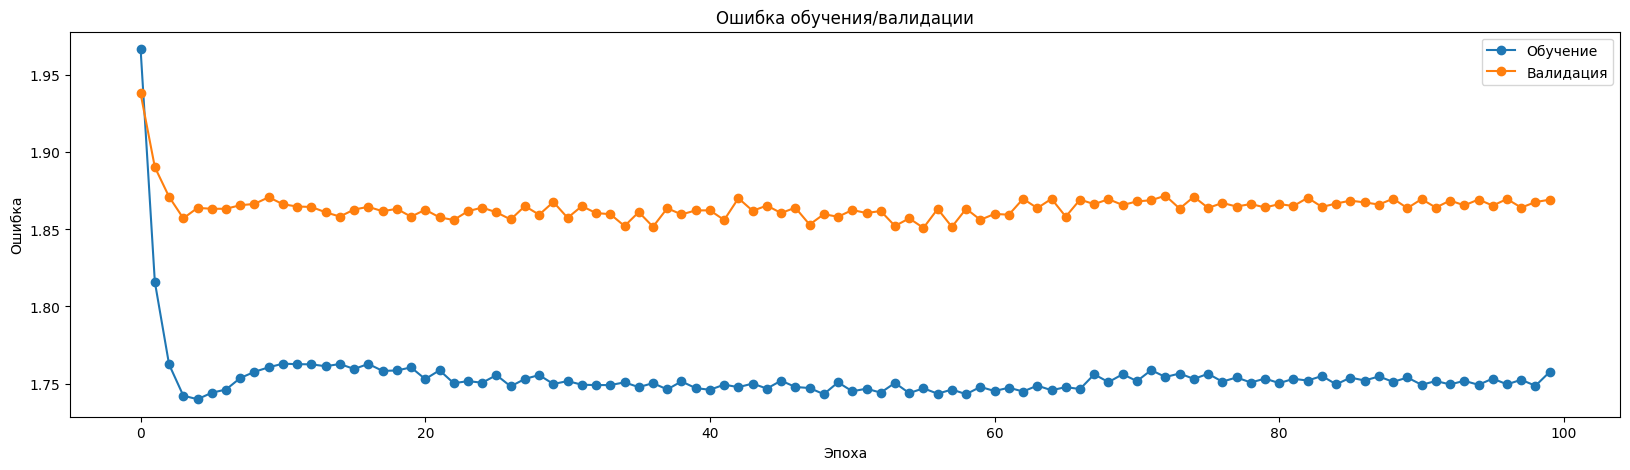

In [48]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_losses,'-o')
plt.plot(val_losses,'-o')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка')
plt.legend(['Обучение','Валидация'])
plt.title('Ошибка обучения/валидации')
plt.show()


График точности при обучении /валидации:




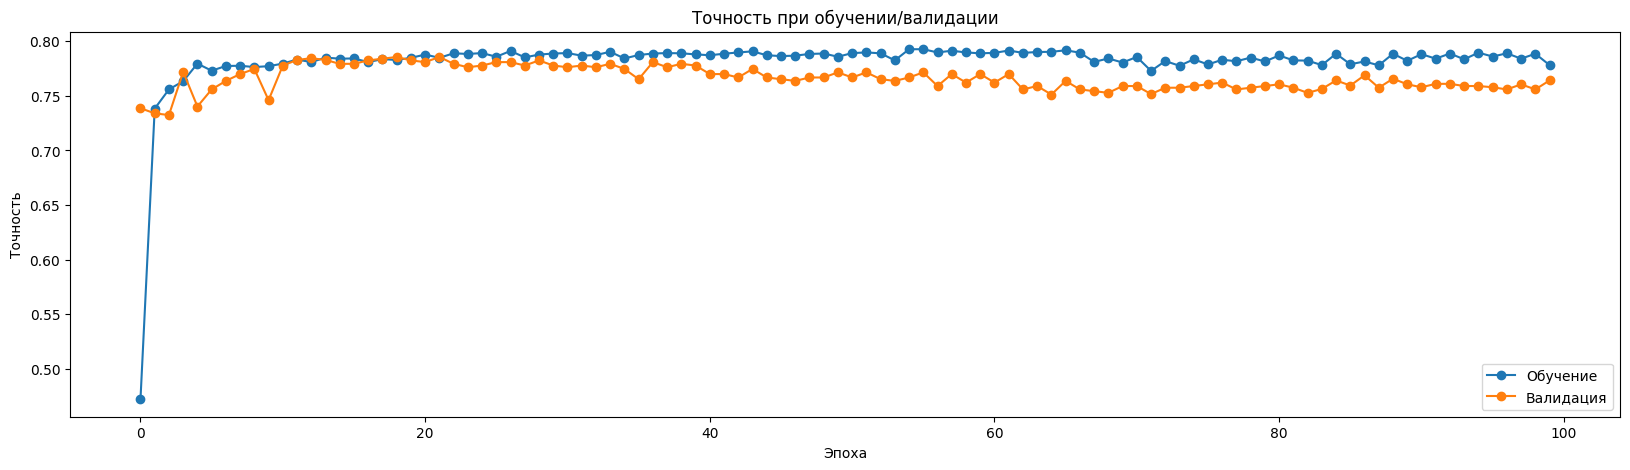

In [49]:
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(train_accs,'-o')
plt.plot(val_accs,'-o')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend(['Обучение','Валидация'])
plt.title('Точность при обучении/валидации')
plt.show()

Тест:

In [50]:
model = torch.load('best-model.pt', weights_only=False);
model.eval();

In [51]:
preds=[]
trgts=[]
with torch.no_grad():
  for data in tqdm(test_loader):
    inputs, targets=data[0].to(device),data[1].to(device)
    outputs=model(inputs)
    targets=targets.to('cpu').numpy()
    pred = outputs.data.max(1, keepdim=True)[1]
    pred = pred.to('cpu').numpy()
    trgts.append(targets)
    preds.append(pred)

100%|██████████| 20/20 [00:00<00:00, 876.35it/s]


In [52]:
targets=[x for sub in trgts for x in sub]
predictions=[x[0] for sub in preds for x in sub]
targets=np.array(targets)
predictions=np.array(predictions)

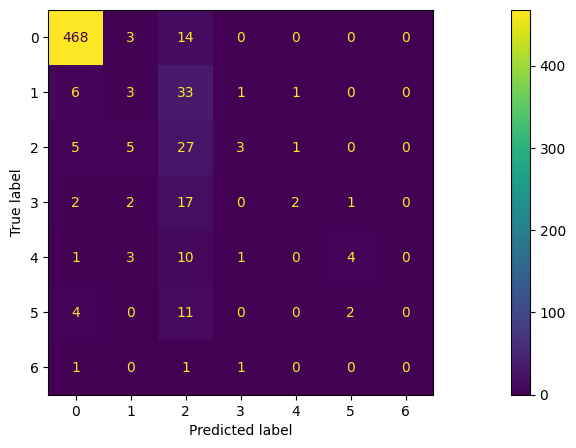

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score
cm = confusion_matrix(targets, predictions)
ConfusionMatrixDisplay(cm).plot()

In [54]:
f1_score(targets, predictions,average='micro')

0.7898894154818326

Вывод:

В ходе работы была успешно реализована модель классификации качества испанских вин на основе 11 характеристик. После предобработки данных (удаление пропусков, кодирование категориальных признаков, стандартизация) и разделения на выборки была обучена нейронная сеть с тремя полносвязными слоями. Модель достигла точности 78.53% на валидации и F1-score 78.99% на тесте, демонстрируя сходимость без переобучения. Модель пригодна для предсказания, но требует доработок для повышения точности.